# Fundamentals of Data Analysis using Python and Pandas - Coursera

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('World population.csv')
#to read first 7 rows
df.head(7)

,Country or dependency,Population 2020,Land Area,Med. Age
0,China,1440297825,9388211,38
1,India,1382345085,2973190,28
2,United States,331341050,9147420,38
3,Indonesia,274021604,1811570,30
4,Pakistan,221612785,770880,23
5,Brazil,212821986,8358140,33
6,Nigeria,206984347,910770,18


In [19]:
#to read last 5 rows
df.tail(5)


,Country or dependency,Population 2020,Land Area,Med. Age
230,Montserrat,4993,100,N.A.
231,Falkland Islands,3497,12170,N.A.
232,Niue,1628,260,N.A.
233,Tokelau,1360,10,N.A.
234,Holy See,801,0,N.A.


In [22]:
#to know (rows , col)

df.shape

(235, 4)

In [23]:
#to know datatypes for each col , Notice that the data type of (Age) is object !!! its suppose to be integer
df.dtypes

Country or dependency    object
Population 2020           int64
Land Area                 int64
Med. Age                 object
dtype: object

In [25]:
#to know both data types & how many entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country or dependency  235 non-null    object
 1   Population 2020        235 non-null    int64 
 2   Land Area              235 non-null    int64 
 3   Med. Age               235 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.5+ KB


In [26]:
#to know how much unique values
df.nunique()

Country or dependency    235
Population 2020          235
Land Area                226
Med. Age                  35
dtype: int64

In [28]:
#to know a rapid statiscs
df.describe()

,Population 2020,Land Area
count,2.350000e+02,2.350000e+02
mean,3.322744e+07,5.535918e+05
std,1.353034e+08,1.687796e+06
min,8.010000e+02,0.000000e+00
25%,3.994905e+05,2.545000e+03
50%,5.460109e+06,7.724000e+04
75%,2.067170e+07,4.038200e+05
max,1.440298e+09,1.637687e+07


Data cleaning

In [29]:
df.columns

Index(['Country or dependency', 'Population 2020', 'Land Area', 'Med. Age'], dtype='object')

In [30]:
#Modify col. titles

new_lables = []
for col in df.columns:
    col = col.lower()
    col = col.replace(' ','_')
    col = col.replace('.','')
    new_lables.append(col)

new_lables

['country_or_dependency', 'population_2020', 'land_area', 'med_age']

In [32]:
#assign new lables to the old
df.columns= new_lables

df.head()

,country_or_dependency,population_2020,land_area,med_age
0,China,1440297825,9388211,38
1,India,1382345085,2973190,28
2,United States,331341050,9147420,38
3,Indonesia,274021604,1811570,30
4,Pakistan,221612785,770880,23


In [36]:
#when we want to calculate Median / AVG , Python well produce an error whe a value is null
# so we gonna replace the null value with NAN

df['med_age'].value_counts()


med_age
N.A.    34
19      14
28      12
43      11
32      11
42      10
18      10
20       9
30       8
38       7
26       7
24       7
40       7
22       7
17       6
34       6
31       6
45       5
21       5
29       5
41       5
44       5
33       5
23       4
25       4
37       4
36       4
35       3
46       3
27       3
39       3
47       2
15       1
16       1
48       1
Name: count, dtype: int64

In [39]:
#In the context of the replace method in pandas, the inplace=True parameter means that the modification will be done directly on the original DataFrame without creating a new DataFrame
df.replace('N.A.', np.nan , inplace= True)

In [40]:
df['med_age'].value_counts()

med_age
19    14
28    12
32    11
43    11
18    10
42    10
20     9
30     8
24     7
22     7
38     7
26     7
40     7
34     6
17     6
31     6
21     5
29     5
44     5
45     5
41     5
33     5
36     4
37     4
23     4
25     4
35     3
27     3
46     3
39     3
47     2
15     1
16     1
48     1
Name: count, dtype: int64

In [41]:
df['land_area'].value_counts()

land_area
460        3
700        2
10         2
180        2
30         2
          ..
1083300    1
30280      1
27560      1
106440     1
0          1
Name: count, Length: 226, dtype: int64

In [42]:
#no country has land area = 0 so we should modify it
df[df['land_area']==0]


,country_or_dependency,population_2020,land_area,med_age
234,Holy See,801,0,NaN


In [45]:
df['land_area'].replace(0,0.4,inplace=True)

In [46]:
df[df['land_area']==0]


,country_or_dependency,population_2020,land_area,med_age


### Adding new col

In [48]:
#Add new density col and round it to 3 decimal numbers

df['density']= (df['population_2020'] / df['land_area']).round(decimals=3)

df.head()


,country_or_dependency,population_2020,land_area,med_age,density
0,China,1440297825,9388211.0,38,153.416
1,India,1382345085,2973190.0,28,464.937
2,United States,331341050,9147420.0,38,36.222
3,Indonesia,274021604,1811570.0,30,151.262
4,Pakistan,221612785,770880.0,23,287.480


In [53]:
df['world_share']= (df['population_2020'] / sum(df['population_2020'])*100)
df['world_share'] = df['world_share'].round()
df['world_share'] = df['world_share'].astype(int)
df.head()

,country_or_dependency,population_2020,land_area,med_age,density,world_share
0,China,1440297825,9388211.0,38,153.416,18
1,India,1382345085,2973190.0,28,464.937,18
2,United States,331341050,9147420.0,38,36.222,4
3,Indonesia,274021604,1811570.0,30,151.262,4
4,Pakistan,221612785,770880.0,23,287.480,3


### Ask questions and finding answera

In [54]:
#What is the biggest country?
df['land_area'].max()

16376870.0

In [55]:
df[df['land_area']==16376870.0]

,country_or_dependency,population_2020,land_area,med_age,density,world_share
8,Russia,145945524,16376870.0,40,8.912,2


In [58]:
#what is the country that has the largest density?
df[df['density'] == df['density'].max()]

,country_or_dependency,population_2020,land_area,med_age,density,world_share
213,Monaco,39290,1.0,NaN,39290.0,0


In [59]:
#what is the country that has the less density?
df[df['density'] == df['density'].min()]

,country_or_dependency,population_2020,land_area,med_age,density,world_share
208,Greenland,56787,410450.0,NaN,0.138,0


In [114]:
#What is the VG med age?
#Error because age is object not integer

df['med_age'].mean()

30.606965174129353

In [115]:
#we choose float as data type becuase there is a NAN value

df['med_age'] = df['med_age'].astype(float)


In [116]:
df['med_age'].mean()

30.606965174129353

In [117]:
#what is the Max world share?

df.describe()


,population_2020,land_area,med_age,density,world_share
count,2.350000e+02,2.350000e+02,201.000000,235.000000,235.000000
mean,3.322744e+07,5.535918e+05,30.606965,531.478438,0.370213
std,1.353034e+08,1.687796e+06,9.127965,3003.738009,1.750203
min,8.010000e+02,4.000000e-01,15.000000,0.138000,0.000000
25%,3.994905e+05,2.545000e+03,22.000000,37.369000,0.000000
50%,5.460109e+06,7.724000e+04,30.000000,94.938000,0.000000
75%,2.067170e+07,4.038200e+05,39.000000,240.076500,0.000000
max,1.440298e+09,1.637687e+07,48.000000,39290.000000,18.000000


In [118]:
df [df['world_share']== 18]

,country_or_dependency,population_2020,land_area,med_age,density,world_share
0,China,1440297825,9388211.0,38.0,153.416,18
1,India,1382345085,2973190.0,28.0,464.937,18


In [119]:
#what is the top 10 countrie by population?

df_sorted = df.sort_values(by = 'population_2020', ascending=False , axis=0)


In [120]:
df_top_population= df_sorted.head(10)
df_top_population

,country_or_dependency,population_2020,land_area,med_age,density,world_share
0,China,1440297825,9388211.0,38.0,153.416,18
1,India,1382345085,2973190.0,28.0,464.937,18
2,United States,331341050,9147420.0,38.0,36.222,4
3,Indonesia,274021604,1811570.0,30.0,151.262,4
4,Pakistan,221612785,770880.0,23.0,287.480,3
5,Brazil,212821986,8358140.0,33.0,25.463,3
6,Nigeria,206984347,910770.0,18.0,227.263,3
7,Bangladesh,164972348,130170.0,28.0,1267.361,2
8,Russia,145945524,16376870.0,40.0,8.912,2
9,Mexico,129166028,1943950.0,29.0,66.445,2


### Data visulization

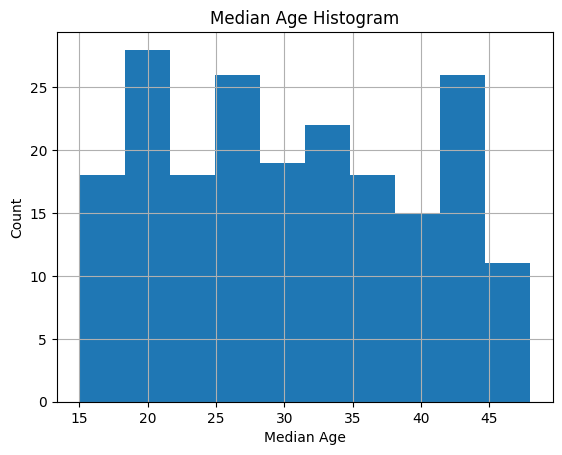

In [121]:
df ['med_age'].hist()

plt.title ('Median Age Histogram')
plt.xlabel('Median Age')
plt.ylabel('Count')
plt.show()

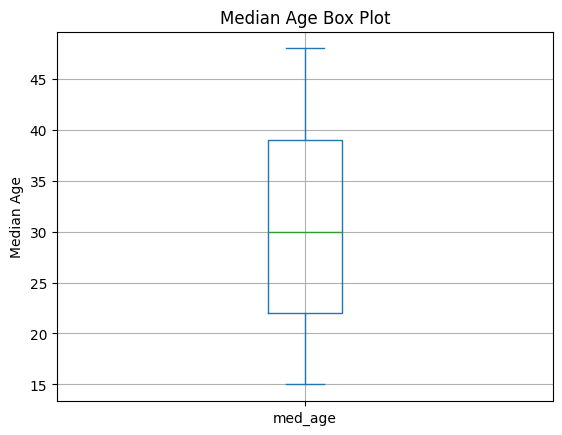

In [122]:
#Min - 25% - median - 75% - Max

df['med_age'].plot(kind='box')
plt.title ('Median Age Box Plot')
plt.ylabel('Median Age')
plt.grid()
plt.show()

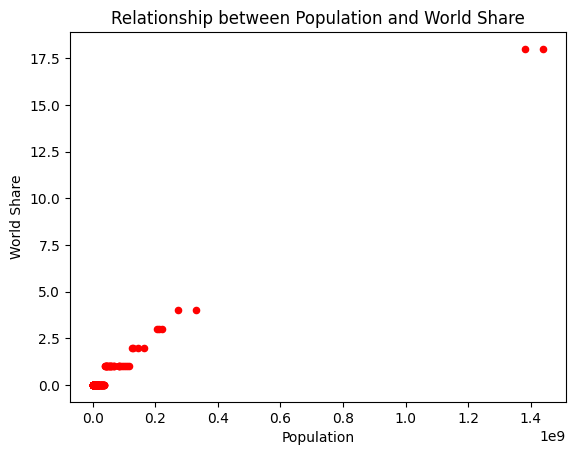

In [123]:
df.plot(kind = 'scatter' , x = 'population_2020', y='world_share', color='r')

plt.title ('Relationship between Population and World Share')
plt.xlabel('Population')
plt.ylabel('World Share')
plt.show()



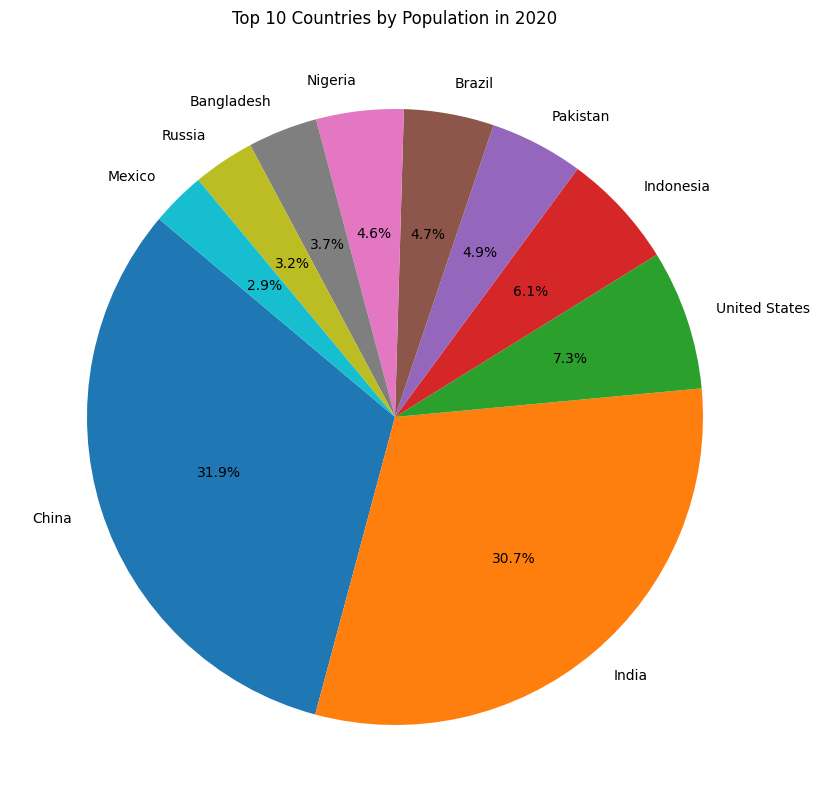

In [125]:
top_10_countries = df.nlargest(10, 'population_2020')

# Plotting a pie chart
plt.figure(figsize=(15, 10))
plt.pie(top_10_countries['population_2020'], labels=top_10_countries['country_or_dependency'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries by Population in 2020')
plt.show()